In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/finance_sales_project/cleaned_sales_data.csv")

Mounted at /content/drive


In [2]:
df_model = df.copy()

# Drop rows where profit is missing
df_model = df_model.dropna(subset=["profit"])

In [3]:
df_model["unit_margin"] = (
    df_model["sale_price"] - df_model["manufacturing_price"]
)

In [4]:
df_model["gross_revenue"] = (
    df_model["sale_price"] * df_model["units_sold"]
)

In [5]:
df_model["discount_ratio"] = (
    df_model["discounts"] / df_model["gross_revenue"]
)

df_model["discount_ratio"] = (
    df_model["discount_ratio"]
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
)

In [6]:
features = [
    "units_sold",
    "unit_margin",
    "discount_ratio",
    "month"
]

In [6]:
df["profit"].isna().sum()
df_model = df.dropna(subset=["profit"])

In [7]:
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model["profit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [10]:
sample = X_test.iloc[[0]].copy()

# Increase discount
sample["discount_ratio"] = sample["discount_ratio"] * 1.5
print("Higher discount:", model.predict(sample))

# Increase margin
sample["unit_margin"] = sample["unit_margin"] * 1.5
print("Higher margin:", model.predict(sample))


Higher discount: [17004.025]
Higher margin: [12568.54333333]


In [11]:
import joblib

joblib.dump(
    model,
    "/content/drive/MyDrive/finance_sales_project/profit_model.pkl"
)

['/content/drive/MyDrive/finance_sales_project/profit_model.pkl']

In [12]:
def simulate_profit(units_sold, sale_price, manufacturing_price, discounts, month):
    input_df = pd.DataFrame([{
        "units_sold": units_sold,
        "sale_price": sale_price,
        "manufacturing_price": manufacturing_price,
        "discounts": discounts,
        "month": month
    }])
    return model.predict(input_df)[0]

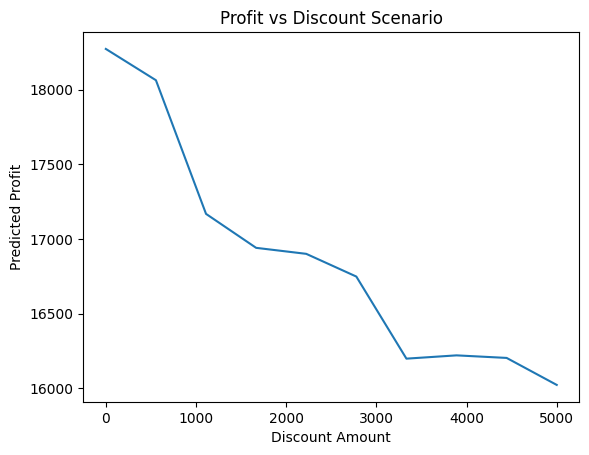

In [13]:
import numpy as np

discounts = np.linspace(0, 5000, 10)
profits = [
    simulate_profit(2000, 20, 12, d, 6)
    for d in discounts
]

plt.plot(discounts, profits)
plt.xlabel("Discount Amount")
plt.ylabel("Predicted Profit")
plt.title("Profit vs Discount Scenario")
plt.show()

In [13]:
import joblib

joblib.dump(
    model,
    "/content/drive/MyDrive/finance_sales_project/profit_model.pkl"
)

['/content/drive/MyDrive/finance_sales_project/profit_model.pkl']

In [15]:
from google.colab import files
files.download("/content/drive/MyDrive/finance_sales_project/cleaned_sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
files.download("/content/drive/MyDrive/finance_sales_project/profit_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>